# Dataset-Generator.

In [1]:
import os
from datagenerator import DataGenerator
import pickle
import random
import utils

Using TensorFlow backend.


In [2]:
import multiprocessing
multiprocessing_jobs = multiprocessing.cpu_count()
print("Going to spawn", multiprocessing_jobs, "jobs...")

Going to spawn 8 jobs...


# Setting the parameters.

In [3]:
if os.path.exists("datasetpath.txt"):
    dataset_path = open("datasetpath.txt", "r").read().replace("\n", "")
else:
    dataset_path = "../data"

# For creating voxelgrids.
dataset_parameters_voxelgrids = {}
dataset_parameters_voxelgrids["input_type"] = "voxelgrid"
dataset_parameters_voxelgrids["output_targets"] = ["height", "weight"]    
dataset_parameters_voxelgrids["random_seed"] = 666
dataset_parameters_voxelgrids["voxelgrid_target_shape"] = (32, 32, 32)
dataset_parameters_voxelgrids["voxel_size_meters"] = 0.1
dataset_parameters_voxelgrids["voxelgrid_random_rotation"] = True
dataset_parameters_voxelgrids["dataset_size_train"] = 6000
dataset_parameters_voxelgrids["dataset_size_test"] = 1000

# For creating pointclouds.
dataset_parameters_pointclouds = {}
dataset_parameters_pointclouds["input_type"] = "pointcloud"
dataset_parameters_pointclouds["output_targets"] = ["height", "weight"]    
dataset_parameters_pointclouds["random_seed"] = 666
dataset_parameters_pointclouds["pointcloud_target_size"] = 30000
dataset_parameters_pointclouds["pointcloud_random_rotation"] = True
dataset_parameters_pointclouds["dataset_size_train"] = 3000
dataset_parameters_pointclouds["dataset_size_test"] = 500

In [4]:
dataset_parameters_to_use = []
dataset_parameters_to_use.append(dataset_parameters_pointclouds)
dataset_parameters_to_use.append(dataset_parameters_voxelgrids)

# Creating the data-generator.
Makes use of the parameters.

In [5]:
def create_datagenerator(dataset_parameters):
    print("Creating data-generator...")
    datagenerator = DataGenerator(
        dataset_path=dataset_path, 
        input_type=dataset_parameters["input_type"], 
        output_targets=dataset_parameters["output_targets"],
        voxelgrid_target_shape=dataset_parameters.get("voxelgrid_target_shape", None),
        voxel_size_meters=dataset_parameters.get("voxel_size_meters", None),
        voxelgrid_random_rotation=dataset_parameters.get("voxelgrid_random_rotation", None),
        pointcloud_target_size=dataset_parameters.get("pointcloud_target_size", None),
        pointcloud_random_rotation=dataset_parameters.get("pointcloud_random_rotation", None)
    )
    datagenerator.print_statistics()
    return datagenerator

# Analysis.

In [6]:
datagenerator = create_datagenerator(dataset_parameters_to_use[0])

Creating data-generator...
/Users/tristanbehrens/Datasets/welthungerhilfe/20180803
QR-Code SAM-GOV-025 has 1 different manual measurements
   Target [67, 6.7] with 0 JPGs and 51 PCDs.
QR-Code SAM-SNG-073 has 3 different manual measurements
   Target [82, 8.8] with 0 JPGs and 41 PCDs.
   Target [82, 8.8] with 0 JPGs and 40 PCDs.
   Target [82, 8.5] with 0 JPGs and 0 PCDs.
QR-Code SAM-GOV-014 has 1 different manual measurements
   Target [91.1, 11.1] with 0 JPGs and 77 PCDs.
QR-Code SAM-GOV-087 has 1 different manual measurements
   Target [85.7, 10.2] with 0 JPGs and 60 PCDs.
QR-Code SAM-GOV-004 has 1 different manual measurements
   Target [76.2, 8.3] with 0 JPGs and 71 PCDs.
QR-Code SAM-GOV-026 has 1 different manual measurements
   Target [80.1, 9.2] with 0 JPGs and 47 PCDs.
QR-Code SAM-GOV-068 has 1 different manual measurements
   Target [73.3, 7.4] with 0 JPGs and 39 PCDs.
QR-Code SAM-SNG-013 has 1 different manual measurements
   Target [93.7, 11.2] with 0 JPGs and 0 PCDs.
QR-Cod

In [7]:
datagenerator.analyze_files()

Number of JPGs: 0
Number of PCDs: 3633
Number of JSONs (personal): 83
Number of JSONs (measures): 177


Analyzing pointclouds...


100% (3633 of 3633) |####################| Elapsed Time: 0:35:18 Time:  0:35:18


Rendering histogram...


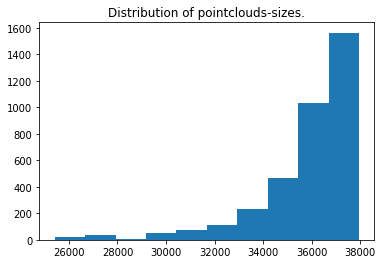

In [8]:
datagenerator.analyze_pointclouds()

Analyzing voxelgrids...


  3% (124 of 3633) |                     | Elapsed Time: 0:00:28 ETA:   0:11:21

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-059/measurements/1531912975783/pc/pc_SAM-SNG-059_1531912975783_104_009.pcd
Wrong number of columns at line 25021


  9% (331 of 3633) |#                    | Elapsed Time: 0:01:22 ETA:   0:14:12

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-068/measurements/1531721652325/pc/pc_SAM-SNG-068_1531721652325_104_003.pcd
Wrong number of columns at line 26440


  9% (338 of 3633) |#                    | Elapsed Time: 0:01:24 ETA:   0:13:48

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-068/measurements/1531721652325/pc/pc_SAM-SNG-068_1531721652325_107_014.pcd
Wrong number of columns at line 26454


  9% (345 of 3633) |#                    | Elapsed Time: 0:01:25 ETA:   0:13:49

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-068/measurements/1531721652325/pc/pc_SAM-SNG-068_1531721652325_107_007.pcd
Wrong number of columns at line 33272


 10% (370 of 3633) |##                   | Elapsed Time: 0:01:32 ETA:   0:13:12

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771667078/pc/pc_SAM-SNG-067_1530771667078_110_019.pcd
Wrong number of columns at line 26636


 10% (390 of 3633) |##                   | Elapsed Time: 0:01:37 ETA:   0:14:17

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771548441/pc/pc_SAM-SNG-067_1530771548441_107_009.pcd
Wrong number of columns at line 33561


 10% (392 of 3633) |##                   | Elapsed Time: 0:01:38 ETA:   0:13:39

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771548441/pc/pc_SAM-SNG-067_1530771548441_107_012.pcd
Wrong number of columns at line 26553


 11% (401 of 3633) |##                   | Elapsed Time: 0:01:40 ETA:   0:14:45

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771548441/pc/pc_SAM-SNG-067_1530771548441_104_007.pcd
Wrong number of columns at line 33683


 11% (403 of 3633) |##                   | Elapsed Time: 0:01:41 ETA:   0:14:00

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771548441/pc/pc_SAM-SNG-067_1530771548441_104_002.pcd
Wrong number of columns at line 26650


 41% (1510 of 3633) |########            | Elapsed Time: 0:06:30 ETA:   0:08:47

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-087/measurements/1531981556882/pc/pc_SAM-SNG-087_1531981556882_107_016.pcd
Wrong number of columns at line 32241


 42% (1542 of 3633) |########            | Elapsed Time: 0:06:38 ETA:   0:08:02

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-087/measurements/1531981556882/pc/pc_SAM-SNG-087_1531981556882_107_025.pcd
Wrong number of columns at line 26051


 42% (1560 of 3633) |########            | Elapsed Time: 0:06:43 ETA:   0:08:28

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-087/measurements/1531375820597/pc/pc_SAM-SNG-087_1531375820597_104_000.pcd
Wrong number of columns at line 26361


 43% (1590 of 3633) |########            | Elapsed Time: 0:06:50 ETA:   0:08:22

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-073/measurements/1531992617745/pc/pc_SAM-SNG-073_1531992617745_110_039.pcd
Wrong number of columns at line 25969


 45% (1653 of 3633) |#########           | Elapsed Time: 0:07:06 ETA:   0:08:33

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-073/measurements/1531372466716/pc/pc_SAM-SNG-073_1531372466716_110_032.pcd
Wrong number of columns at line 26670


 45% (1661 of 3633) |#########           | Elapsed Time: 0:07:08 ETA:   0:08:28

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-073/measurements/1531372466716/pc/pc_SAM-SNG-073_1531372466716_107_017.pcd
Wrong number of columns at line 26667


 46% (1673 of 3633) |#########           | Elapsed Time: 0:07:11 ETA:   0:08:17

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-072/measurements/1531805886160/pc/pc_SAM-SNG-072_1531805886160_107_009.pcd
Wrong number of columns at line 27708
/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-072/measurements/1531805886160/pc/pc_SAM-SNG-072_1531805886160_107_010.pcd
Wrong number of columns at line 27889


 46% (1679 of 3633) |#########           | Elapsed Time: 0:07:13 ETA:   0:07:53

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-072/measurements/1531805886160/pc/pc_SAM-SNG-072_1531805886160_107_012.pcd
Wrong number of columns at line 27808


 50% (1828 of 3633) |##########          | Elapsed Time: 0:07:51 ETA:   0:07:14

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-088/measurements/1531393153524/pc/pc_SAM-SNG-088_1531393153524_110_039.pcd
Wrong number of columns at line 25919


 51% (1873 of 3633) |##########          | Elapsed Time: 0:08:03 ETA:   0:07:29

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-088/measurements/1531393153524/pc/pc_SAM-SNG-088_1531393153524_104_002.pcd
Wrong number of columns at line 33593


 52% (1917 of 3633) |##########          | Elapsed Time: 0:08:15 ETA:   0:07:06

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_104_002.pcd
Wrong number of columns at line 26065


 53% (1936 of 3633) |##########          | Elapsed Time: 0:08:20 ETA:   0:07:30

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_107_029.pcd
Wrong number of columns at line 26526


 53% (1946 of 3633) |##########          | Elapsed Time: 0:08:22 ETA:   0:07:42

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_107_026.pcd
Wrong number of columns at line 33481


 53% (1959 of 3633) |##########          | Elapsed Time: 0:08:26 ETA:   0:07:43

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_107_020.pcd
Wrong number of columns at line 33604


 55% (2013 of 3633) |###########         | Elapsed Time: 0:08:39 ETA:   0:06:00

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722045496/pc/pc_SAM-SNG-098_1531722045496_107_017.pcd
Wrong number of columns at line 25819


 60% (2213 of 3633) |############        | Elapsed Time: 0:09:28 ETA:   0:06:01

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_004.pcd
Wrong number of columns at line 31940


 61% (2218 of 3633) |############        | Elapsed Time: 0:09:29 ETA:   0:05:48

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_005.pcd
Wrong number of columns at line 32084


 61% (2222 of 3633) |############        | Elapsed Time: 0:09:30 ETA:   0:05:58

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_006.pcd
Wrong number of columns at line 32517


 61% (2226 of 3633) |############        | Elapsed Time: 0:09:31 ETA:   0:05:31

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_002.pcd
Wrong number of columns at line 31545
/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_003.pcd
Wrong number of columns at line 31603


 61% (2228 of 3633) |############        | Elapsed Time: 0:09:32 ETA:   0:05:14

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_017.pcd
Wrong number of columns at line 25896


 61% (2233 of 3633) |############        | Elapsed Time: 0:09:33 ETA:   0:05:22

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-097/measurements/1531200660089/pc/pc_SAM-SNG-097_1531200660089_104_000.pcd
Wrong number of columns at line 32573


 92% (3345 of 3633) |##################  | Elapsed Time: 0:14:19 ETA:   0:01:01

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-084/measurements/1531379403081/pc/pc_SAM-SNG-084_1531379403081_107_030.pcd
Wrong number of columns at line 26239


 92% (3348 of 3633) |##################  | Elapsed Time: 0:14:19 ETA:   0:01:00

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-084/measurements/1531379403081/pc/pc_SAM-SNG-084_1531379403081_107_019.pcd
Wrong number of columns at line 26222


 92% (3372 of 3633) |##################  | Elapsed Time: 0:14:25 ETA:   0:00:59

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-084/measurements/1531379403081/pc/pc_SAM-SNG-084_1531379403081_104_007.pcd
Wrong number of columns at line 25616


 92% (3377 of 3633) |##################  | Elapsed Time: 0:14:26 ETA:   0:00:57

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-084/measurements/1531379403081/pc/pc_SAM-SNG-084_1531379403081_110_035.pcd
Wrong number of columns at line 26323


 94% (3437 of 3633) |##################  | Elapsed Time: 0:14:41 ETA:   0:00:47

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-083/measurements/1531379712442/pc/pc_SAM-SNG-083_1531379712442_107_012.pcd
Wrong number of columns at line 25900


 94% (3451 of 3633) |##################  | Elapsed Time: 0:14:44 ETA:   0:00:38

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-083/measurements/1531379712442/pc/pc_SAM-SNG-083_1531379712442_104_006.pcd
Wrong number of columns at line 25977


 96% (3495 of 3633) |################### | Elapsed Time: 0:14:55 ETA:   0:00:33

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-014/measurements/1531291318886/pc/pc_SAM-SNG-014_1531291318886_110_039.pcd
Wrong number of columns at line 26558


 98% (3576 of 3633) |################### | Elapsed Time: 0:15:15 ETA:   0:00:13

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-076/measurements/1532324695162/pc/pc_SAM-SNG-076_1532324695162_107_016.pcd
Wrong number of columns at line 26736


 98% (3578 of 3633) |################### | Elapsed Time: 0:15:15 ETA:   0:00:13

/Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-076/measurements/1532324695162/pc/pc_SAM-SNG-076_1532324695162_107_015.pcd
Wrong number of columns at line 26769


100% (3633 of 3633) |####################| Elapsed Time: 0:15:28 Time:  0:15:28


Getting the PCDs with the lowest voxel densities...
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-073/measurements/1531992617745/pc/pc_SAM-SNG-073_1531992617745_110_039.pcd
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_107_026.pcd
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771667078/pc/pc_SAM-SNG-067_1530771667078_110_019.pcd
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_107_029.pcd
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-098/measurements/1531722388458/pc/pc_SAM-SNG-098_1531722388458_104_002.pcd
0 : /Users/tristanbehrens/Datasets/welthungerhilfe/20180803/storage/person/SAM-SNG-067/measurements/1530771548441/pc/pc_SAM-SNG-067_1530771548441_107_009.pcd


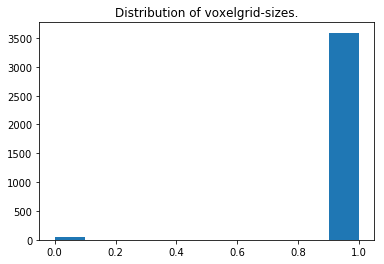

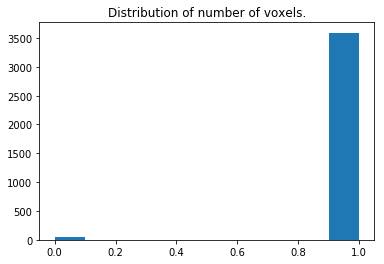

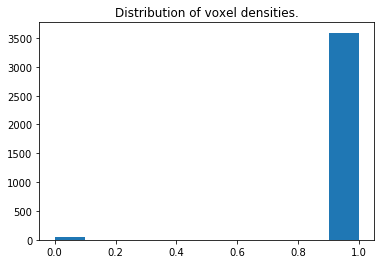

In [9]:
datagenerator.analyze_voxelgrids()

# Do the train-test-split and generate.

In [10]:
def split_and_generate(datagenerator, dataset_parameters):

    # Do the split.
    random.seed(dataset_parameters["random_seed"])
    qrcodes_shuffle = datagenerator.qrcodes[:]
    random.shuffle(qrcodes_shuffle)
    split_index = int(0.8 * len(qrcodes_shuffle))
    qrcodes_train = sorted(qrcodes_shuffle[:split_index])
    qrcodes_test = sorted(qrcodes_shuffle[split_index:])
    del qrcodes_shuffle
    print("")

    print("QR-Codes for training:", " ".join(qrcodes_train))
    print("")
    print("QR-Codes for testing:", " ".join(qrcodes_test))
    print("")

    print("Generating training data...")
    dataset_train = next(datagenerator.generate(size=dataset_parameters["dataset_size_train"], qrcodes_to_use=qrcodes_train, yield_file_paths=True, verbose=True, multiprocessing_jobs=multiprocessing_jobs))

    print("Generating testing data...")
    dataset_test = next(datagenerator.generate(size=dataset_parameters["dataset_size_test"], qrcodes_to_use=qrcodes_test, yield_file_paths=True, verbose=True, multiprocessing_jobs=multiprocessing_jobs))

    print("Done.")
    return dataset_train, dataset_test

# Method for saving dataset.

In [11]:
def save_dataset(dataset_train, dataset_test, dataset_parameters):
    print("Saving dataset...")
    datetime_string = utils.get_datetime_string()
    dataset_name = datetime_string + "-" + dataset_parameters["input_type"] + "-dataset.p"
    pickle.dump((dataset_train, dataset_test, dataset_parameters), open(dataset_name, "wb"))
    print("Saved " + dataset_name)

# Generate with parameters.

In [12]:
for dataset_parameters in dataset_parameters_to_use:
    
    datagenerator = create_datagenerator(dataset_parameters)
    dataset_train, dataset_test = split_and_generate(datagenerator, dataset_parameters)
    save_dataset(dataset_train, dataset_test, dataset_parameters)    

Creating data-generator...
/Users/tristanbehrens/Datasets/welthungerhilfe/20180803
QR-Code SAM-GOV-025 has 1 different manual measurements
   Target [67, 6.7] with 0 JPGs and 51 PCDs.
QR-Code SAM-SNG-073 has 3 different manual measurements
   Target [82, 8.8] with 0 JPGs and 41 PCDs.
   Target [82, 8.8] with 0 JPGs and 40 PCDs.
   Target [82, 8.5] with 0 JPGs and 0 PCDs.
QR-Code SAM-GOV-014 has 1 different manual measurements
   Target [91.1, 11.1] with 0 JPGs and 77 PCDs.
QR-Code SAM-GOV-087 has 1 different manual measurements
   Target [85.7, 10.2] with 0 JPGs and 60 PCDs.
QR-Code SAM-GOV-004 has 1 different manual measurements
   Target [76.2, 8.3] with 0 JPGs and 71 PCDs.
QR-Code SAM-GOV-026 has 1 different manual measurements
   Target [80.1, 9.2] with 0 JPGs and 47 PCDs.
QR-Code SAM-GOV-068 has 1 different manual measurements
   Target [73.3, 7.4] with 0 JPGs and 39 PCDs.
QR-Code SAM-SNG-013 has 1 different manual measurements
   Target [93.7, 11.2] with 0 JPGs and 0 PCDs.
QR-Cod

Generating using QR-codes: ['SAM-GOV-001', 'SAM-GOV-004', 'SAM-GOV-005', 'SAM-GOV-008', 'SAM-GOV-011', 'SAM-GOV-013', 'SAM-GOV-014', 'SAM-GOV-023', 'SAM-GOV-025', 'SAM-GOV-026', 'SAM-GOV-033', 'SAM-GOV-034', 'SAM-GOV-035', 'SAM-GOV-037', 'SAM-GOV-038', 'SAM-GOV-042', 'SAM-GOV-043', 'SAM-GOV-044', 'SAM-GOV-045', 'SAM-GOV-046', 'SAM-GOV-049', 'SAM-GOV-050', 'SAM-GOV-051', 'SAM-GOV-052', 'SAM-GOV-054', 'SAM-GOV-063', 'SAM-GOV-064', 'SAM-GOV-066', 'SAM-GOV-067', 'SAM-GOV-068', 'SAM-GOV-069', 'SAM-GOV-073', 'SAM-GOV-089', 'SAM-GOV-090', 'SAM-GOV-099', 'SAM-SNG-011', 'SAM-SNG-013', 'SAM-SNG-014', 'SAM-SNG-015', 'SAM-SNG-016', 'SAM-SNG-018', 'SAM-SNG-059', 'SAM-SNG-061', 'SAM-SNG-066', 'SAM-SNG-067', 'SAM-SNG-068', 'SAM-SNG-070', 'SAM-SNG-075', 'SAM-SNG-076', 'SAM-SNG-081', 'SAM-SNG-083', 'SAM-SNG-085', 'SAM-SNG-086', 'SAM-SNG-088', 'SAM-SNG-091', 'SAM-SNG-095', 'SAM-SNG-096', 'SAM-SNG-097', 'SAM-SNG-098', 'SAM-SNG-099']
Generating using QR-codes: ['SAM-GOV-001', 'SAM-GOV-004', 'SAM-GOV-005',

  2% (11 of 375) |                       | Elapsed Time: 0:00:06 ETA:   0:04:11

Wrong number of columns at line 26636


  5% (22 of 375) |#                      | Elapsed Time: 0:00:14 ETA:   0:04:22

Wrong number of columns at line 26736


 11% (42 of 375) |##                     | Elapsed Time: 0:00:29 ETA:   0:04:00

Wrong number of columns at line 25977


 14% (55 of 375) |###                    | Elapsed Time: 0:00:38 ETA:   0:03:54

Wrong number of columns at line 25977


 14% (56 of 375) |###                    | Elapsed Time: 0:00:40 ETA:   0:03:54

Wrong number of columns at line 25977


 25% (96 of 375) |#####                  | Elapsed Time: 0:01:14 ETA:   0:03:45

Wrong number of columns at line 26553


 37% (142 of 375) |########              | Elapsed Time: 0:01:51 ETA:   0:02:48

Wrong number of columns at line 33683


 45% (170 of 375) |#########             | Elapsed Time: 0:02:14 ETA:   0:02:32

Wrong number of columns at line 33683


 56% (212 of 375) |############          | Elapsed Time: 0:02:46 ETA:   0:02:02

Wrong number of columns at line 25919


 76% (288 of 375) |################      | Elapsed Time: 0:03:48 ETA:   0:01:06

Wrong number of columns at line 26736


 82% (311 of 375) |##################    | Elapsed Time: 0:04:08 ETA:   0:01:02

Wrong number of columns at line 33593


100% (375 of 375) |######################| Elapsed Time: 0:04:58 Time:  0:04:58
 99% (372 of 375) |##################### | Elapsed Time: 0:04:59 ETA:   0:00:02

Wrong number of columns at line 26636


100% (375 of 375) |######################| Elapsed Time: 0:05:00 Time:  0:05:00
100% (375 of 375) |######################| Elapsed Time: 0:05:00 Time:  0:05:00
100% (375 of 375) |######################| Elapsed Time: 0:05:00 Time:  0:05:00
100% (375 of 375) |######################| Elapsed Time: 0:05:01 Time:  0:05:01
100% (375 of 375) |######################| Elapsed Time: 0:05:01 Time:  0:05:01
100% (375 of 375) |######################| Elapsed Time: 0:05:01 Time:  0:05:01
100% (375 of 375) |######################| Elapsed Time: 0:05:01 Time:  0:05:01


Generating testing data...
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-S

 29% (18 of 62) |######                  | Elapsed Time: 0:00:12 ETA:   0:00:38

Wrong number of columns at line 26361


 67% (42 of 62) |################        | Elapsed Time: 0:00:30 ETA:   0:00:14

Wrong number of columns at line 26667


 85% (53 of 62) |####################    | Elapsed Time: 0:00:38 ETA:   0:00:06

Wrong number of columns at line 26670


 90% (56 of 62) |#####################   | Elapsed Time: 0:00:40 ETA:   0:00:04

Wrong number of columns at line 26361


100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45

100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (62 of 62) |########################| Elapsed Time: 0:00:45 Time:  0:00:45
100% (66 of 66) |########################| Elapsed Time: 0:00:46 Time:  0:00:46


Done.
Saving dataset...
Saved 20180807-1057-pointcloud-dataset.p
Creating data-generator...
/Users/tristanbehrens/Datasets/welthungerhilfe/20180803
QR-Code SAM-GOV-025 has 1 different manual measurements
   Target [67, 6.7] with 0 JPGs and 51 PCDs.
QR-Code SAM-SNG-073 has 3 different manual measurements
   Target [82, 8.8] with 0 JPGs and 41 PCDs.
   Target [82, 8.8] with 0 JPGs and 40 PCDs.
   Target [82, 8.5] with 0 JPGs and 0 PCDs.
QR-Code SAM-GOV-014 has 1 different manual measurements
   Target [91.1, 11.1] with 0 JPGs and 77 PCDs.
QR-Code SAM-GOV-087 has 1 different manual measurements
   Target [85.7, 10.2] with 0 JPGs and 60 PCDs.
QR-Code SAM-GOV-004 has 1 different manual measurements
   Target [76.2, 8.3] with 0 JPGs and 71 PCDs.
QR-Code SAM-GOV-026 has 1 different manual measurements
   Target [80.1, 9.2] with 0 JPGs and 47 PCDs.
QR-Code SAM-GOV-068 has 1 different manual measurements
   Target [73.3, 7.4] with 0 JPGs and 39 PCDs.
QR-Code SAM-SNG-013 has 1 different manual m

Generating using QR-codes: ['SAM-GOV-001', 'SAM-GOV-004', 'SAM-GOV-005', 'SAM-GOV-008', 'SAM-GOV-011', 'SAM-GOV-013', 'SAM-GOV-014', 'SAM-GOV-023', 'SAM-GOV-025', 'SAM-GOV-026', 'SAM-GOV-033', 'SAM-GOV-034', 'SAM-GOV-035', 'SAM-GOV-037', 'SAM-GOV-038', 'SAM-GOV-042', 'SAM-GOV-043', 'SAM-GOV-044', 'SAM-GOV-045', 'SAM-GOV-046', 'SAM-GOV-049', 'SAM-GOV-050', 'SAM-GOV-051', 'SAM-GOV-052', 'SAM-GOV-054', 'SAM-GOV-063', 'SAM-GOV-064', 'SAM-GOV-066', 'SAM-GOV-067', 'SAM-GOV-068', 'SAM-GOV-069', 'SAM-GOV-073', 'SAM-GOV-089', 'SAM-GOV-090', 'SAM-GOV-099', 'SAM-SNG-011', 'SAM-SNG-013', 'SAM-SNG-014', 'SAM-SNG-015', 'SAM-SNG-016', 'SAM-SNG-018', 'SAM-SNG-059', 'SAM-SNG-061', 'SAM-SNG-066', 'SAM-SNG-067', 'SAM-SNG-068', 'SAM-SNG-070', 'SAM-SNG-075', 'SAM-SNG-076', 'SAM-SNG-081', 'SAM-SNG-083', 'SAM-SNG-085', 'SAM-SNG-086', 'SAM-SNG-088', 'SAM-SNG-091', 'SAM-SNG-095', 'SAM-SNG-096', 'SAM-SNG-097', 'SAM-SNG-098', 'SAM-SNG-099']
Generating using QR-codes: ['SAM-GOV-001', 'SAM-GOV-004', 'SAM-GOV-005',

  2% (15 of 750) |                       | Elapsed Time: 0:00:10 ETA:   0:09:18

Wrong number of columns at line 25919


  4% (34 of 750) |#                      | Elapsed Time: 0:00:24 ETA:   0:10:59

Wrong number of columns at line 26553


 12% (94 of 750) |##                     | Elapsed Time: 0:01:12 ETA:   0:08:52

Wrong number of columns at line 25977


 14% (105 of 750) |###                   | Elapsed Time: 0:01:21 ETA:   0:09:05

Wrong number of columns at line 26526


 14% (112 of 750) |###                   | Elapsed Time: 0:01:26 ETA:   0:08:32

Wrong number of columns at line 33593


 18% (136 of 750) |###                   | Elapsed Time: 0:01:46 ETA:   0:08:31

Wrong number of columns at line 25977


 19% (146 of 750) |####                  | Elapsed Time: 0:01:53 ETA:   0:07:57

Wrong number of columns at line 25021


 19% (145 of 750) |####                  | Elapsed Time: 0:01:53 ETA:   0:07:49

Wrong number of columns at line 26736


 23% (174 of 750) |#####                 | Elapsed Time: 0:02:16 ETA:   0:07:23

Wrong number of columns at line 25919


 25% (193 of 750) |#####                 | Elapsed Time: 0:02:32 ETA:   0:09:45

Wrong number of columns at line 26769


 30% (227 of 750) |######                | Elapsed Time: 0:03:04 ETA:   0:07:26

Wrong number of columns at line 26065


 30% (231 of 750) |######                | Elapsed Time: 0:03:07 ETA:   0:07:22

Wrong number of columns at line 33593


 30% (232 of 750) |######                | Elapsed Time: 0:03:09 ETA:   0:09:38

Wrong number of columns at line 26553


 31% (234 of 750) |######                | Elapsed Time: 0:03:11 ETA:   0:06:59

Wrong number of columns at line 26769


 32% (242 of 750) |#######               | Elapsed Time: 0:03:15 ETA:   0:07:01

Wrong number of columns at line 25977


 35% (266 of 750) |#######               | Elapsed Time: 0:03:36 ETA:   0:07:14

Wrong number of columns at line 26636


 36% (276 of 750) |########              | Elapsed Time: 0:03:44 ETA:   0:06:17

Wrong number of columns at line 26736


 46% (350 of 750) |##########            | Elapsed Time: 0:04:44 ETA:   0:05:13

Wrong number of columns at line 26650


 47% (358 of 750) |##########            | Elapsed Time: 0:04:51 ETA:   0:05:19

Wrong number of columns at line 26736


 51% (385 of 750) |###########           | Elapsed Time: 0:05:12 ETA:   0:04:52

Wrong number of columns at line 26553


 53% (401 of 750) |###########           | Elapsed Time: 0:05:25 ETA:   0:04:57

Wrong number of columns at line 26769


 53% (404 of 750) |###########           | Elapsed Time: 0:05:27 ETA:   0:04:41

Wrong number of columns at line 26553


 53% (401 of 750) |###########           | Elapsed Time: 0:05:28 ETA:   0:05:49

Wrong number of columns at line 33561


 57% (431 of 750) |############          | Elapsed Time: 0:05:51 ETA:   0:04:30

Wrong number of columns at line 25919


 61% (463 of 750) |#############         | Elapsed Time: 0:06:16 ETA:   0:04:02

Wrong number of columns at line 26736


 68% (510 of 750) |##############        | Elapsed Time: 0:06:55 ETA:   0:03:12

Wrong number of columns at line 33593


 72% (540 of 750) |###############       | Elapsed Time: 0:07:23 ETA:   0:02:42

Wrong number of columns at line 33683


 73% (549 of 750) |################      | Elapsed Time: 0:07:28 ETA:   0:02:37

Wrong number of columns at line 26736


 76% (572 of 750) |################      | Elapsed Time: 0:07:44 ETA:   0:02:26

Wrong number of columns at line 25919


 76% (574 of 750) |################      | Elapsed Time: 0:07:46 ETA:   0:02:22

Wrong number of columns at line 26636


 78% (586 of 750) |#################     | Elapsed Time: 0:07:55 ETA:   0:02:07

Wrong number of columns at line 26736


 80% (600 of 750) |#################     | Elapsed Time: 0:08:08 ETA:   0:02:06

Wrong number of columns at line 26650


 85% (643 of 750) |##################    | Elapsed Time: 0:08:45 ETA:   0:01:25

Wrong number of columns at line 26636


 86% (650 of 750) |###################   | Elapsed Time: 0:08:49 ETA:   0:01:16

Wrong number of columns at line 26736


 88% (666 of 750) |###################   | Elapsed Time: 0:09:05 ETA:   0:01:32

Wrong number of columns at line 26636


 91% (686 of 750) |####################  | Elapsed Time: 0:09:22 ETA:   0:00:49

Wrong number of columns at line 25021


 93% (704 of 750) |####################  | Elapsed Time: 0:09:33 ETA:   0:00:36

Wrong number of columns at line 33561


 94% (709 of 750) |####################  | Elapsed Time: 0:09:38 ETA:   0:00:32

Wrong number of columns at line 33561


100% (750 of 750) |######################| Elapsed Time: 0:10:09 Time:  0:10:09
100% (750 of 750) |######################| Elapsed Time: 0:10:10 Time:  0:10:10
100% (750 of 750) |######################| Elapsed Time: 0:10:11 Time:  0:10:11
100% (750 of 750) |######################| Elapsed Time: 0:10:12 Time:  0:10:12
100% (750 of 750) |######################| Elapsed Time: 0:10:12 Time:  0:10:12
100% (750 of 750) |######################| Elapsed Time: 0:10:12 Time:  0:10:12
100% (750 of 750) |######################| Elapsed Time: 0:10:12 Time:  0:10:12
100% (750 of 750) |######################| Elapsed Time: 0:10:13 Time:  0:10:13


Generating testing data...
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-SNG-074', 'SAM-SNG-084', 'SAM-SNG-087']
Generating using QR-codes: ['SAM-GOV-002', 'SAM-GOV-012', 'SAM-GOV-036', 'SAM-GOV-041', 'SAM-GOV-087', 'SAM-GOV-088', 'SAM-SNG-012', 'SAM-SNG-021', 'SAM-SNG-036', 'SAM-SNG-069', 'SAM-SNG-072', 'SAM-SNG-073', 'SAM-S

  1% (2 of 125) |                        | Elapsed Time: 0:00:01 ETA:   0:01:05

Wrong number of columns at line 26667


  5% (7 of 125) |#                       | Elapsed Time: 0:00:04 ETA:   0:01:21

Wrong number of columns at line 26667


 20% (26 of 125) |####                   | Elapsed Time: 0:00:20 ETA:   0:01:25

Wrong number of columns at line 26670


 31% (39 of 125) |#######                | Elapsed Time: 0:00:30 ETA:   0:01:10

Wrong number of columns at line 25616


 53% (67 of 125) |############           | Elapsed Time: 0:00:55 ETA:   0:00:51

Wrong number of columns at line 26051


 55% (69 of 125) |############           | Elapsed Time: 0:00:57 ETA:   0:00:47

Wrong number of columns at line 26222


 66% (83 of 125) |###############        | Elapsed Time: 0:01:09 ETA:   0:00:38

Wrong number of columns at line 26323


 69% (87 of 125) |################       | Elapsed Time: 0:01:13 ETA:   0:00:32

Wrong number of columns at line 26323


100% (125 of 125) |######################| Elapsed Time: 0:01:41 Time:  0:01:41
100% (125 of 125) |######################| Elapsed Time: 0:01:41 Time:  0:01:41
100% (125 of 125) |######################| Elapsed Time: 0:01:41 Time:  0:01:41
100% (125 of 125) |######################| Elapsed Time: 0:01:41 Time:  0:01:41
100% (125 of 125) |######################| Elapsed Time: 0:01:42 Time:  0:01:42
100% (125 of 125) |######################| Elapsed Time: 0:01:42 Time:  0:01:42
100% (125 of 125) |######################| Elapsed Time: 0:01:42 Time:  0:01:42
100% (125 of 125) |######################| Elapsed Time: 0:01:42 Time:  0:01:42


Done.
Saving dataset...
Saved 20180807-1109-voxelgrid-dataset.p
